In [7]:


#*K Nearest Neighbors is a classification algorithm

#*K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

#Firstly we store all the dataSecondly we calculate the data from x to all points in our data set, x indicationg particular new data point Then we sort the points near data by increasing distance from xFinally we predict the majority label of K, which is number and represent closest points

#*Choosing a K will effect what class a new point is assigned to: if we choose k=3, then the algorithm looks at the three nearest neighbors to this new point if we set k=6, then the algorithm looks at the six nearest neighbors to this new point and decide according to the majority of these 6 neighbors. If we set larger k values,we get a cleaner cutoff at the expense of mislabelling some points


In [2]:
import os

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pwd

'C:\\Users\\ravij25'

loading data using pandas frame work

In [4]:
df=pd.read_csv(r"C:\Users\ravij25\Desktop\Telecust.csv")

Reading 5 rows the data

In [5]:
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [36]:
df.isnull().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

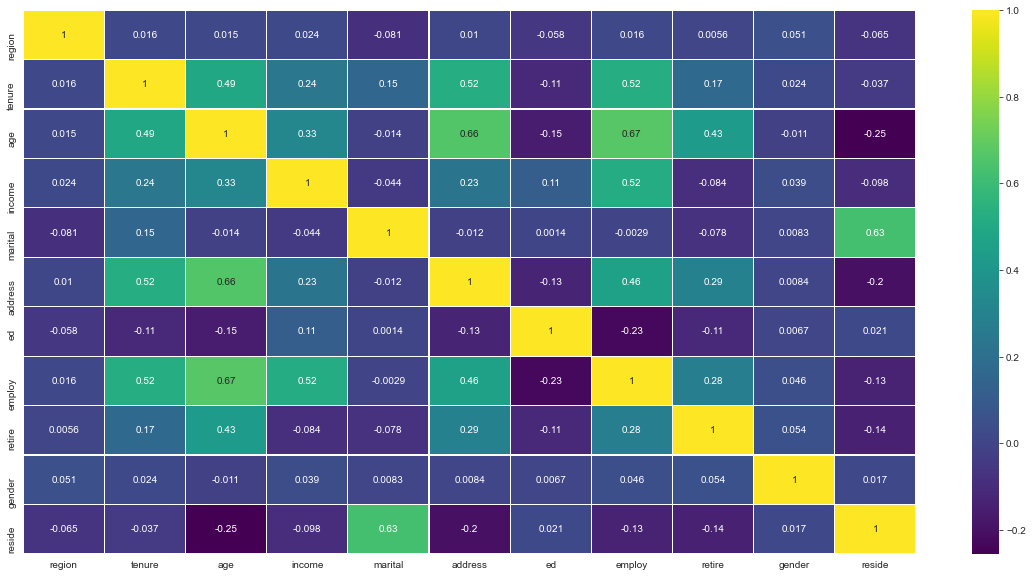

In [38]:


plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="viridis",annot=True,linewidths=0.1)
#Here we get a heatmap of correlation of all features, except from the target column because it is a string



In [39]:


df["custcat"].value_counts()

C    281
A    266
D    236
B    217
Name: custcat, dtype: int64

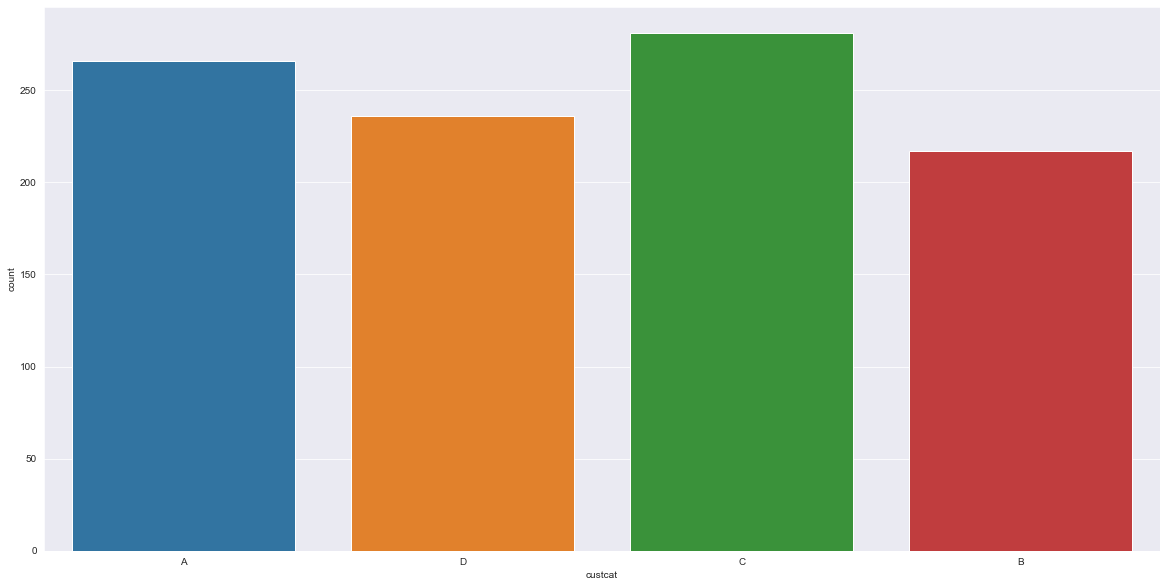

In [40]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.countplot(x="custcat",data=df)
#Here we visualize our target column

In [41]:
#. Normalizing and Splitting Data

In [42]:


X=df.drop("custcat",axis=1) #Here we assign all the other features as our X independent variables
X



,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
0,2,13,44,64,1,9,4,5,0,0,2
1,3,11,33,136,1,7,5,5,0,0,6
2,3,68,52,116,1,24,1,29,0,1,2
3,2,33,33,33,0,12,2,0,0,1,1
4,2,23,30,30,1,9,1,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3
996,1,7,34,22,0,2,5,5,0,1,1
997,3,67,59,944,0,40,5,33,0,1,1
998,3,70,49,87,0,18,2,22,0,1,1


In [43]:


from sklearn.preprocessing import StandardScaler



In [44]:


scaler=StandardScaler()



In [45]:
X= scaler.fit_transform(X)
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [46]:


X.shape



(1000, 11)

In [47]:


y=df["custcat"].map({"A":1, "B":2, "C":3, "D":4})
y



0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [48]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)



Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [49]:
#Using the K Nearest Neighbors Algorithm

In [50]:


from sklearn.neighbors import KNeighborsClassifier



In [51]:


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)



In [52]:


knn.fit(x_train, y_train)#Here the algorithm fit the training data



KNeighborsClassifier(n_neighbors=1)

In [53]:
predictions=knn.predict(x_test) #here we make our predictions
predictions

array([3, 3, 3, 4, 4, 3, 4, 4, 2, 1, 1, 1, 4, 3, 1, 3, 3, 2, 4, 4, 3, 4,
       4, 1, 1, 3, 1, 1, 1, 2, 3, 4, 4, 2, 3, 2, 3, 1, 3, 2, 1, 4, 2, 2,
       2, 1, 2, 1, 4, 2, 1, 4, 2, 4, 4, 3, 4, 3, 1, 1, 1, 3, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 3, 4, 2, 1, 2, 4, 4, 4, 3, 2, 4, 2, 1, 1, 3, 3, 2,
       3, 3, 3, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 4, 4, 3, 1, 3, 2, 4, 2, 1,
       2, 3, 3, 4, 1, 3, 1, 3, 2, 3, 4, 2, 2, 3, 3, 2, 4, 4, 1, 2, 2, 1,
       4, 3, 2, 2, 3, 4, 3, 4, 4, 2, 4, 1, 1, 4, 4, 2, 1, 4, 1, 2, 2, 4,
       2, 4, 3, 3, 3, 2, 3, 1, 1, 1, 3, 4, 1, 3, 3, 4, 1, 3, 2, 2, 2, 3,
       3, 4, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 4, 1, 4, 3, 1, 3, 4, 1, 4,
       2, 3], dtype=int64)

In [54]:


from sklearn import metrics

In [55]:

print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions))

Test set Accuracy:  0.3


In [56]:


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))



[[17 10 17  7]
 [ 9 13 11 11]
 [10 12 17 15]
 [17 10 11 13]]


In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.32      0.33      0.33        51
           2       0.29      0.30      0.29        44
           3       0.30      0.31      0.31        54
           4       0.28      0.25      0.27        51

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.30      0.30      0.30       200



In [58]:


error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    prediction_i=knn.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))



Text(0, 0.5, 'Error Rate')

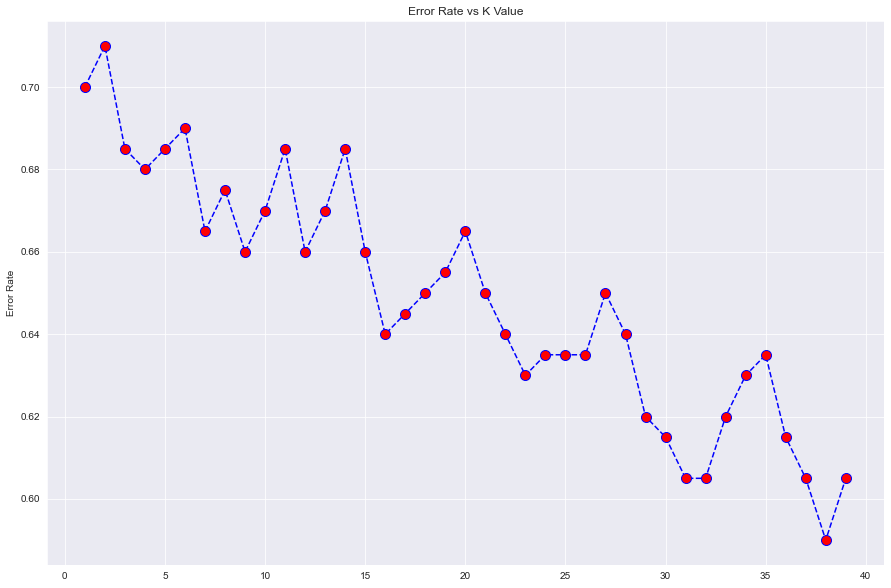

In [59]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")

In [60]:
knn=KNeighborsClassifier(n_neighbors=38)

In [61]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=38)

In [62]:


predictions2=knn.predict(x_test)



In [63]:


print(classification_report(y_test,predictions2))



              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.62      0.30      0.40        44
           3       0.38      0.48      0.43        54
           4       0.45      0.27      0.34        51

    accuracy                           0.41       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.45      0.41      0.40       200





With a better k value, our model predicts far better than before, Nonetheless K Means Classifier is not good for this dataset. We have to use another algorith that performs better..